In [1]:
import sympy as sym
import numpy as np
import time
import cloudpickle

m = [0]*3

with open("Feasible_Solution/no_contact_order/steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("Feasible_Solution/no_contact_order/accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("Feasible_Solution/no_contact_order/decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
N = m[0].N[-1]
cN = m[0].cN[-1]

adder = 0
x = []
z = []
theta_l_L = []
r_L = []
theta_l_R = []
r_R = []

time = []
adder = 0

values = []
positions = []
j = []

values_x = []
positions_x = []
j_x = []
values_z = []
positions_z = []
j_z = []
values_theta_l_L = []
positions_theta_l_L = []
j_theta_l_L = []
values_r_L = []
positions_r_L = []
j_r_L = []
values_theta_l_R = []
positions_theta_l_R = []
j_theta_l_R = []
values_r_R = []
positions_r_R = []
j_r_R = []

def ramp(cur_val, val, cur_pos, dur): 
    global values, positions, j
    A = cur_val   
    B = val
    prev = 0
    pos = cur_pos
    end = 0
    increment = 0
    
    end = cur_pos + dur
    increment = int(dur/10)
    t = 0
    if dur > 25:
        for pos in range(int(cur_pos), int(end), increment):
            t += 1
            k = pos - prev
            prev = pos
            val = A + (B - A)/k
            A = val
            values.append(val)
            positions.append(pos/1000)
        j.append(t)

def interpolate(array, time):
    global values, positions, j
    values = []; positions = []; j = []
    time_dif = 0
    for n in range(0, len(time)-1):
        time_dif = (time[n+1] - time[n])*1000
        ramp(array[n], array[n+1], time[n]*1000, time_dif)
    return values, positions, j
                
def update_arrays(array, values, positions, j):
    tmp = 0
    prev_t = 0
    i = 0
    blank = []
    while i < len(positions):
        for t in range(0, len(time)-1):
            if(positions[i]>time[t] and positions[i]<time[t+1]):
                for q in range(prev_t, t+1):
                    blank.append(array[q])
                    prev_t = t + j[tmp]
                for a in range(0, j[tmp]):
                    blank.append(values[i+a])
                i += j[tmp]
                tmp += 1
                break
    for q in range(prev_t, len(time)):
        blank.append(array[q])
    return blank

# adder = 0
# for i in range(0, 3):
#     if(i>0):
#         adder += (m[i-1].tt[N,cN].value - m[i-1].tt[1,1].value)
#     for n in range(1, N+1):
#         for c in range(1, cN+1):
#             time.append(m[i].tt[n,c].value - m[i].tt[1,1].value + adder)

adder = 0
for i in range(0, 3):
    if(i>0):
        adder += (m[i-1].tt0[N].value - m[i-1].tt0[1].value)
    for n in range(1, N+1):
        time.append(m[i].tt0[n].value - m[i].tt0[1].value + adder)

adder = 0       
for i in range(0, 3):
    if(i>0):
        adder += m[i-1].q0[N,'x'].value
    for n in range(1, N+1):
#         for c in range(1, cN+1):
#             if c == cN:
        x.append(m[i].q0[n,'x'].value + adder)
        z.append(m[i].q0[n,'z'].value)
        theta_l_L.append(m[i].q0[n,'theta_l_L'].value)
        r_L.append(m[i].q0[n,'r_L'].value)
        theta_l_R.append(m[i].q0[n,'theta_l_R'].value)
        r_R.append(m[i].q0[n,'r_R'].value)
#             else:
#                 x.append(m[i].q[n,c,'x'].value + adder)
#                 z.append(m[i].q[n,c,'z'].value)
#                 theta_l_L.append(m[i].q[n,c,'theta_l_L'].value)
#                 r_L.append(m[i].q[n,c,'r_L'].value)
#                 theta_l_R.append(m[i].q[n,c,'theta_l_R'].value)
#                 r_R.append(m[i].q[n,c,'r_R'].value)
        
# time to interpolate the data :)
values_x, positions_x, j_x = interpolate(x, time)
values_z, positions_z, j_z = interpolate(z, time)
values_theta_l_L, positions_theta_l_L, j_theta_l_L = interpolate(theta_l_L, time)
values_r_L, positions_r_L, j_r_L = interpolate(r_L, time)
values_theta_l_R, positions_theta_l_R, j_theta_l_R = interpolate(theta_l_R, time)
values_r_R, positions_r_R, j_r_R = interpolate(r_R, time)

# x = values_x
# z = values_z
# theta_l_L = values_theta_l_L
# r_L = values_r_L
# theta_l_R = values_theta_l_R
# r_R = values_r_R

ass = x
x = update_arrays(x, values_x, positions_x, j_x)
z = update_arrays(z, values_z, positions_z, j_z)
theta_l_L = update_arrays(theta_l_L, values_theta_l_L, positions_theta_l_L, j_theta_l_L)
r_L = update_arrays(r_L, values_r_L, positions_r_L, j_r_L)
theta_l_R = update_arrays(theta_l_R, values_theta_l_R, positions_theta_l_R, j_theta_l_R)
r_R = update_arrays(r_R, values_r_R, positions_r_R, j_r_R)
time = update_arrays(time, positions_x, positions_x, j_x)
print('done')

done


In [2]:
adder = 0
body_xb = []
body_yb = []
body_xf = []
body_yf = []
leg_xt1_L = []
leg_yt1_L = []
leg_xb1_L = []
leg_yb1_L = []
leg_xt2_L = []
leg_yt2_L = []
leg_xb2_L = []
leg_yb2_L = []
leg_xt1_R = []
leg_yt1_R = []
leg_xb1_R = []
leg_yb1_R = []
leg_xt2_R = []
leg_yt2_R = []
leg_xb2_R = []
leg_yb2_R = []

for i in range(0, len(x)):
        body_xb.append(x[i] - 0.5*m[0].lb.value*np.cos(0))
        body_yb.append(z[i] - 0.5*m[0].lb.value*np.sin(0))
        body_xf.append(x[i] + 0.5*m[0].lb.value*np.cos(0))
        body_yf.append(z[i] + 0.5*m[0].lb.value*np.sin(0))  

        # left-------------------------------------------------------------------------------------------------- 
        leg_xt1_L.append(x[i])
        leg_yt1_L.append(z[i]) 
        leg_xb1_L.append(x[i] + m[0].ll1.value*np.cos(theta_l_L[i]))
        leg_yb1_L.append(z[i] - m[0].ll1.value*np.sin(theta_l_L[i]))
        
        leg_xt2_L.append(x[i] + m[0].ll2*np.cos(theta_l_L[i]))
        leg_yt2_L.append(z[i] - m[0].ll2*np.sin(theta_l_L[i]))
        leg_xb2_L.append(x[i] + (m[0].ll2 + r_L[i])*np.cos(theta_l_L[i]))
        leg_yb2_L.append(z[i] - (m[0].ll2 + r_L[i])*np.sin(theta_l_L[i]))

        # right---------------------------------------------------------------------------------------------------
        leg_xt1_R.append(x[i])
        leg_yt1_R.append(z[i]) 
        leg_xb1_R.append(x[i] + m[0].ll1.value*np.cos(theta_l_R[i]))
        leg_yb1_R.append(z[i] - m[0].ll1.value*np.sin(theta_l_R[i])) 

        leg_xt2_R.append(x[i] + m[0].ll2.value*np.cos(theta_l_R[i]))
        leg_yt2_R.append(z[i] - m[0].ll2.value*np.sin(theta_l_R[i]))
        leg_xb2_R.append(x[i] + (m[0].ll2.value + r_R[i])*np.cos(theta_l_R[i]))
        leg_yb2_R.append(z[i] - (m[0].ll2.value + r_R[i])*np.sin(theta_l_R[i]))
            
        
print("done")

done


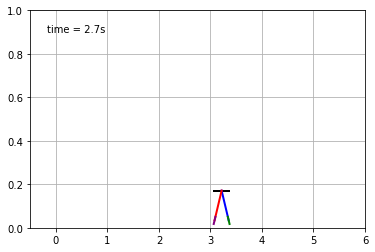

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.02

fig = plt.figure() #figsize=(5, 4)
ax = fig.add_subplot(autoscale_on=False, xlim=(-0.5, 6), ylim=(0, 1.))
# ax.set_aspect('equal')
ax.grid()

line_B, = ax.plot([], [], '-', lw=2, c='black')
line_L1, = ax.plot([], [], '-', lw=2, c='blue')
line_L2, = ax.plot([], [], '-', lw=2, c='green')
line_R1, = ax.plot([], [], '-', lw=2, c='red')
line_R2, = ax.plot([], [], '-', lw=2, c='purple')

time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def animate(i):
    thisx = [body_xb[i], body_xf[i]]
    thisy = [body_yb[i], body_yf[i]]
    line_B.set_data(thisx, thisy)
    
    thisx = [leg_xt1_L[i], leg_xb1_L[i]]
    thisy = [leg_yt1_L[i], leg_yb1_L[i]]
    line_L1.set_data(thisx, thisy)  
    
    thisx = [leg_xt2_L[i], leg_xb2_L[i]]
    thisy = [leg_yt2_L[i], leg_yb2_L[i]]
    line_L2.set_data(thisx, thisy)
    
    thisx = [leg_xt1_R[i], leg_xb1_R[i]]
    thisy = [leg_yt1_R[i], leg_yb1_R[i]]
    line_R1.set_data(thisx, thisy)
    
    thisx = [leg_xt2_R[i], leg_xb2_R[i]]
    thisy = [leg_yt2_R[i], leg_yb2_R[i]]
    line_R2.set_data(thisx, thisy)    
    
    time_text.set_text(time_template % (time[i]))
    return line_B, line_L1, line_L2, line_R1, line_R2, time_text

animate = ani.FuncAnimation(fig, animate, len(body_xb), interval=time[-1]*1000/len(body_xb), blit=False, repeat=False)
# HTML(animate.to_jshtml())
HTML(animate.to_html5_video())

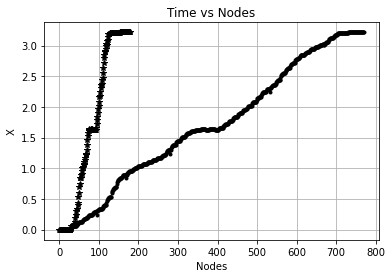

In [4]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as ani
# from IPython.display import HTML

plt.axes()
plt.grid(True)
Time = 0
for n in range (0, len(x)):
    time = x[n]
#     print(time)
    plt.plot(n,time,'k.')
    plt.xlabel('Nodes')
    plt.ylabel('X')
    plt.title('Time vs Nodes')
for n in range (0, len(ass)):
    time = ass[n]
#     print(time)
    plt.plot(n,time,'k*')   
plt.show()